In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.integrate as spi

In [34]:
# define the function
def fun(t,x):
    dx=-5*x+np.sin(3*t)
    return dx

In [35]:
# define input and output spaces
t0 = 0
tf = 10
dt=0.01
t_step = dt*tf
t_span = (t0, tf)
x0 = 5
# define time space
t_space = np.arange(t0, tf, dt)
# initialize solution spaces
# solve ivp handles this
approx_analyt_sol = np.zeros(len(t_space))
fin_diff = np.zeros(len(t_space))

Text(0.5, 1.0, 'Solve_ivp solution')

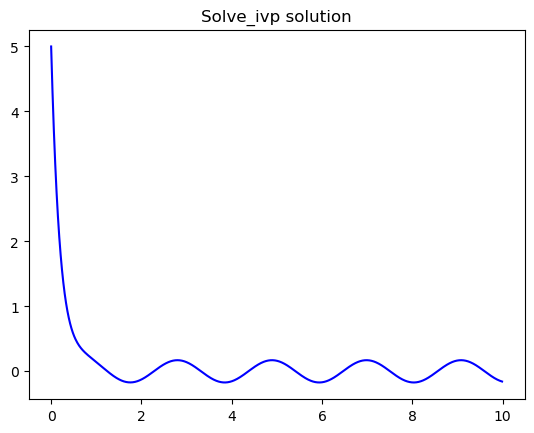

In [36]:
# solve the ODE using solve_ivp
ivp_sol = solve_ivp(fun, t_span, [x0], t_eval=t_space, method='RK45')

#plot the solution
plt.plot(ivp_sol.t, ivp_sol.y[0], color='blue', label='x(t) solve_ivp')
plt.title('Solve_ivp solution')

Text(0.5, 1.0, 'Exact Analytical solution')

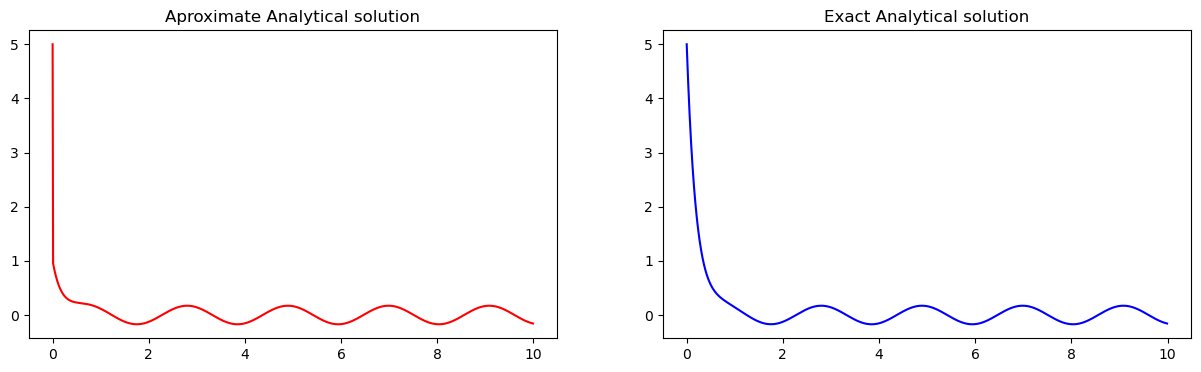

In [37]:
# plot appoximate analytical solution
# $x(t)=e^{-5t}+\int_{0}^te^{-5(t-\tau)}\sin(3\tau)d\tau$
def integrand(tau, t):
    integral = np.exp(-5*(t-tau))*np.sin(3*tau)
    return integral
def fun_analytical_approx(t):
    xt=np.exp(-5*t)+spi.quad(integrand,0,t, args=(t,))[0]
    return xt

# exact analytical solution
#$x(t)=\frac{1}{34}173e^{-5t}+5\sin(3t)-3\cos(3t)$
def fun_analytical(t):
    xt=(1/34)*(173*np.exp(-5*t) + 5*np.sin(3*t) - 3*np.cos(3*t))
    return xt

# estimate the analytical solution
approx_analyt_sol = np.zeros(len(t_space))
approx_analyt_sol[0] = x0
for i in range(1, len(t_space)):
    approx_analyt_sol[i] = fun_analytical_approx(t_space[i])
    
# compute exact analytical solution
closed_analyt_sol = np.zeros(len(t_space))
closed_analyt_sol[0] = x0
for i in range(1, len(t_space)):
    closed_analyt_sol[i] = fun_analytical(t_space[i])

# plot the analytical solutions
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
plt.plot(t_space, approx_analyt_sol, color='red', label='x(t) aprox analytical')
plt.title('Aproximate Analytical solution')

plt.subplot(1,2,2)
plt.plot(t_space, closed_analyt_sol, color='blue', label='x(t) exact analytical')
plt.title('Exact Analytical solution')


Text(0.5, 1.0, 'Finite difference solution')

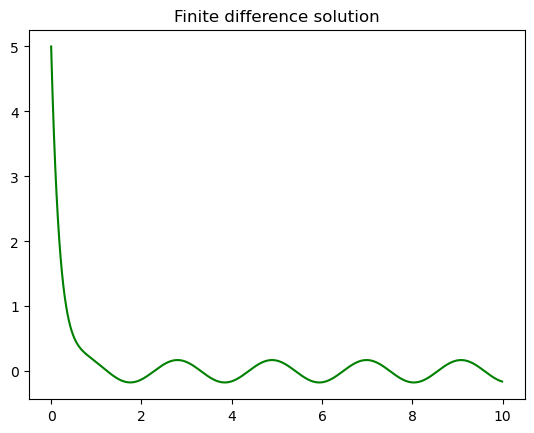

In [38]:
# solve the ODE using finite difference method
fin_diff[0]=x0
t=0 # initial time

for k in range(len(t_space)-1):
    fin_diff[k+1]=dt*fun(t,fin_diff[k]) + fin_diff[k]
    t+=dt
    
#plot the solution
plt.plot(t_space, fin_diff, color='green', label='x(t) finite difference')
plt.title('Finite difference solution')


Text(0.5, 1.0, 'all 3 different solutions stacked in 1 graph')

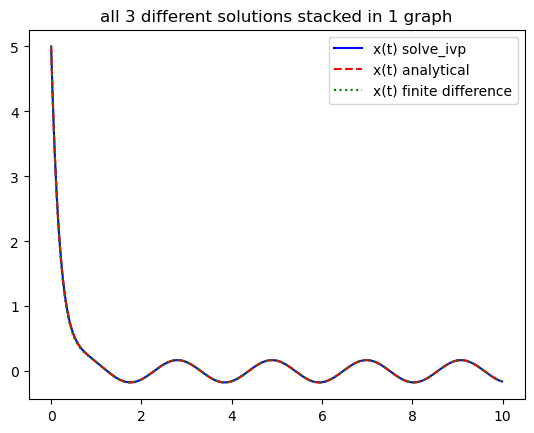

In [39]:
# stack solutions in 1 graph 
plt.figure()
plt.plot(ivp_sol.t, ivp_sol.y[0], color='blue', label='x(t) solve_ivp', linestyle='-')
plt.plot(t_space, closed_analyt_sol, color='red', label='x(t) analytical', linestyle='--')
plt.plot(t_space, fin_diff, color='green', label='x(t) finite difference', linestyle=':')
plt.legend()
plt.title("all 3 different solutions stacked in 1 graph")


Text(0.5, 1.0, 'Erorr between analytical and solve_ivp')

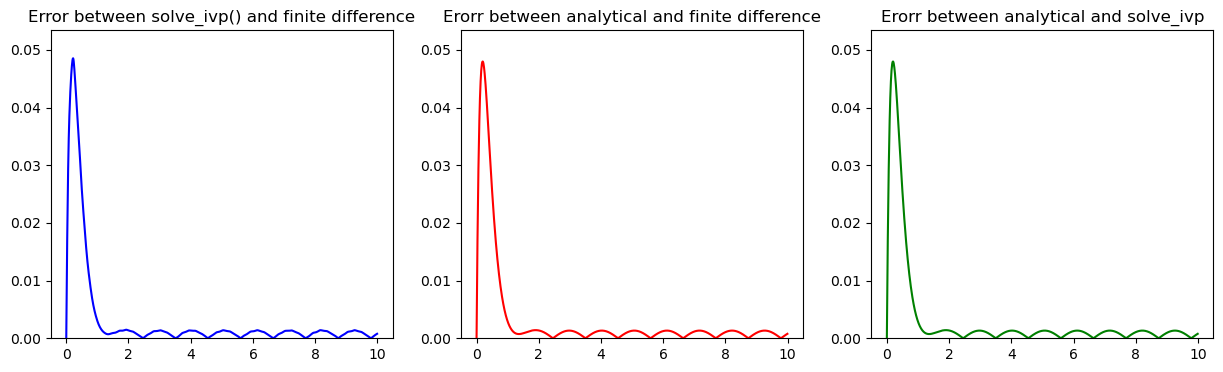

In [43]:
# compute error
plt.figure(figsize=(15, 4))
scipy_error = np.abs(fin_diff - ivp_sol.y[0])
analyt_error = np.abs(fin_diff - closed_analyt_sol)
error = np.abs(ivp_sol.y[0] - closed_analyt_sol)

max_error = max(scipy_error.max(), analyt_error.max(), error.max())
biggest_errror = max_error
max_error = max_error + 0.1*max_error

plt.subplot(1,3,1)
plt.plot(t_space, scipy_error, color='blue')
plt.ylim(0, max_error)
plt.title('Error between solve_ivp() and finite difference')

plt.subplot(1,3,2)
plt.ylim(0, max_error)
plt.plot(t_space, analyt_error, color='red')
plt.title('Erorr between analytical and finite difference')

plt.subplot(1,3,3)
plt.ylim(0, max_error)
plt.plot(t_space, analyt_error, color='green')
plt.title('Erorr between analytical and solve_ivp')